<a href="https://colab.research.google.com/github/revvvv1/Diabates-Decision-Tree-Reyvan/blob/main/Reyvan%20Tugas%20ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import warnings
from sklearn.impute import SimpleImputer
from sklearn import tree

In [ ]:
# Membaca data dari file CSV
Data = pd.read_csv("/content/diabetes.csv")

In [ ]:
# Menampilkan data
print(Data.head())

   Pregnancies  Glucose  BloodPressure  Skinthickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# Menampilkan deskripsi statistik dari data
print(Data.describe())

       Pregnancies     Glucose  BloodPressure  Skinthickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [ ]:
# Memeriksa apakah terdapat nilai yang hilang (NaN) dalam setiap kolom
df_check = Data.isnull().sum()
print(df_check)

Pregnancies                 0
Glucose                     0
BloodPressure               0
Skinthickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Memilih fitur (X) dan target (y)
X = pd.DataFrame(Data, columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
y = Data.Outcome.values.reshape(-1,1)

In [ ]:
# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.02, random_state=1)

In [ ]:
# Mengganti NaN dengan mean dari kolomnya
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [ ]:
# Membangun model Decision Tree setelah imputasi
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train_imputed, y_train)

In [ ]:
# Melakukan prediksi menggunakan model yang telah dibangun
y_pred = clf.predict(X_test_imputed)

In [ ]:
# Mengukur akurasi model
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.875


In [ ]:
text_representation = tree.export_text (clf)
print (text_representation)

|--- feature_0 <= 127.50
|   |--- feature_5 <= 28.50
|   |   |--- feature_3 <= 30.95
|   |   |   |--- class: 0
|   |   |--- feature_3 >  30.95
|   |   |   |--- class: 0
|   |--- feature_5 >  28.50
|   |   |--- feature_3 <= 26.35
|   |   |   |--- class: 0
|   |   |--- feature_3 >  26.35
|   |   |   |--- class: 0
|--- feature_0 >  127.50
|   |--- feature_3 <= 29.95
|   |   |--- feature_0 <= 145.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  145.50
|   |   |   |--- class: 1
|   |--- feature_3 >  29.95
|   |   |--- feature_0 <= 157.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  157.50
|   |   |   |--- class: 1



In [ ]:
with open ("description_tree.log", "w") as fout:
    fout.write(text_representation)

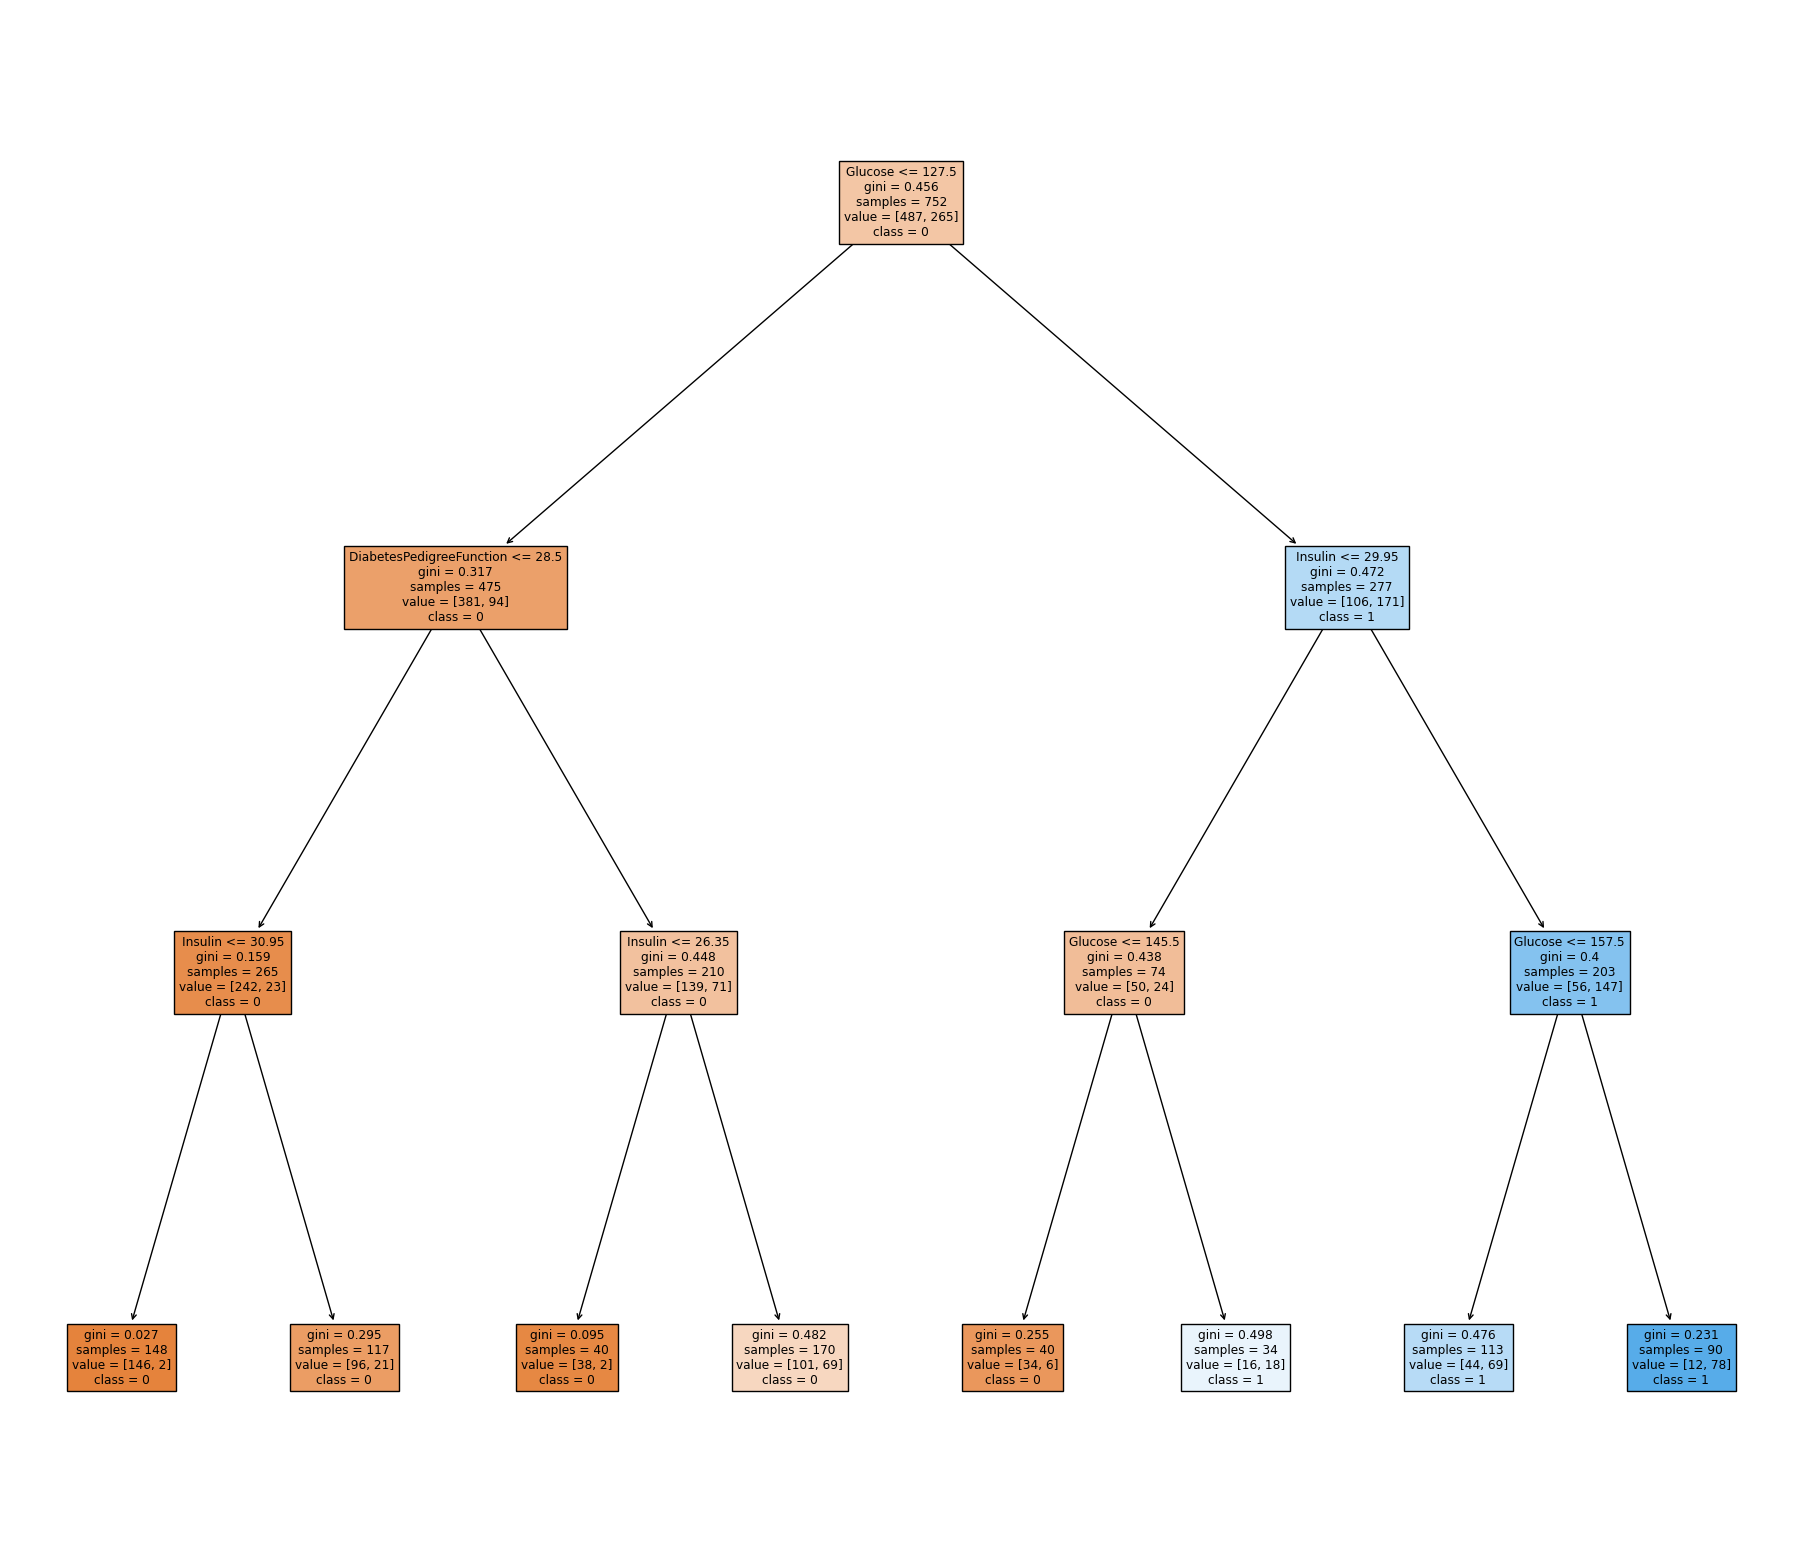

In [ ]:
feature_names = ['Glucose','BloodPressure','Skinthickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target_names = ['0', '1']
fig= plt.figure(figsize=(23,20))
Plot = tree.plot_tree(clf,
                      feature_names= feature_names,
                      class_names = target_names,
                      filled = True)
fig.savefig('Tree1.png')

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(X_train_imputed, y_train)
y_pred = clf.predict(X_test_imputed)


In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.875


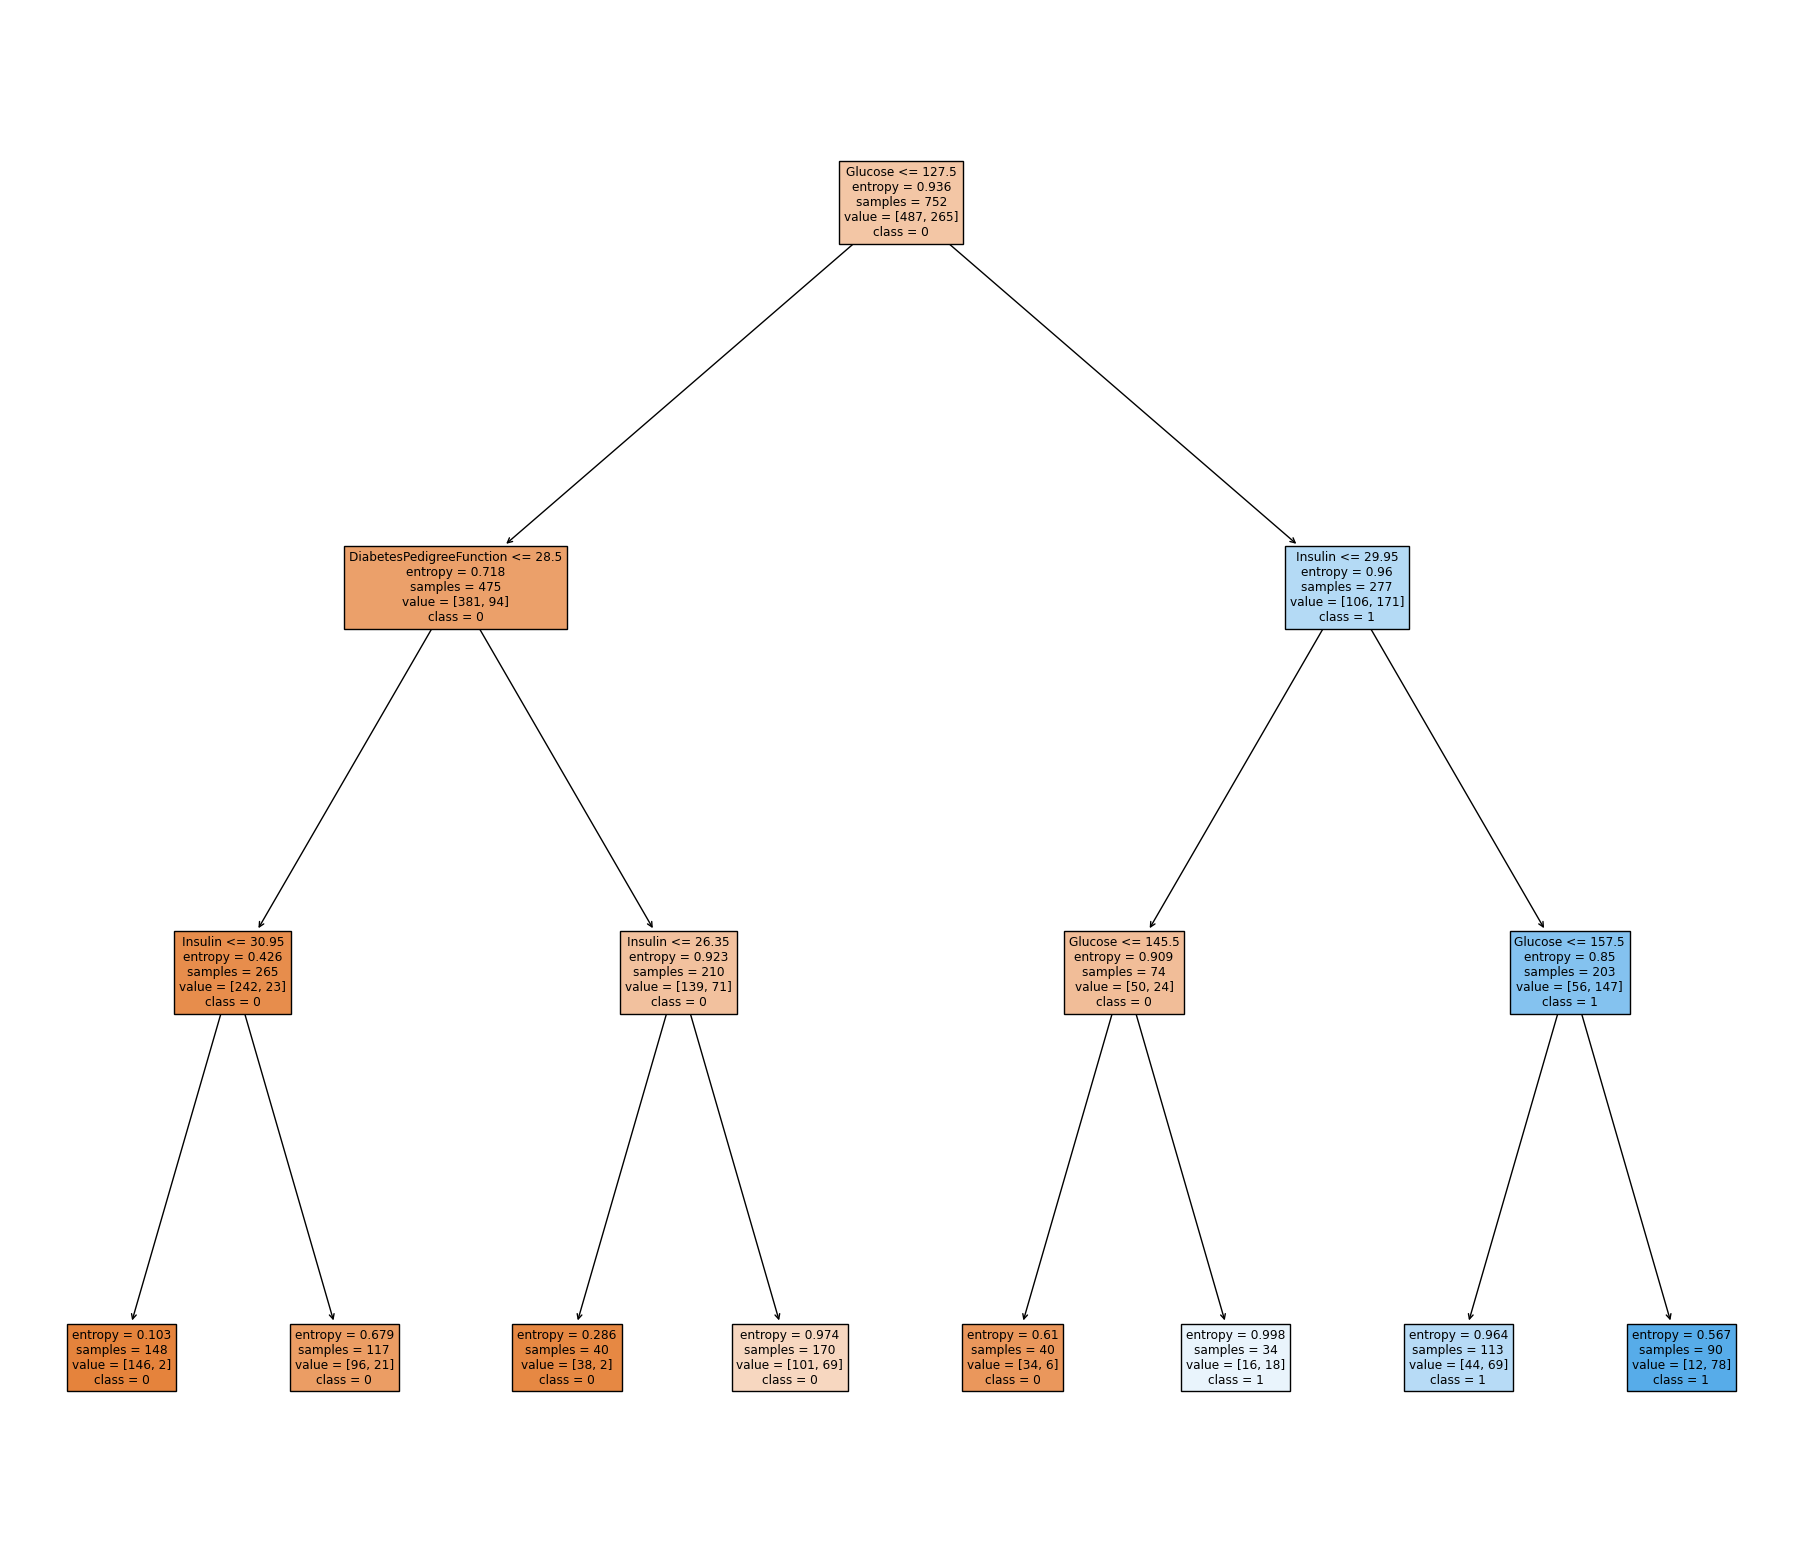

In [ ]:
from sklearn import tree
feature_names = ['Glucose','BloodPressure','Skinthickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target_names = ['0', '1']
fig = plt.figure(figsize=(23, 20))
Plot = tree.plot_tree(clf, feature_names=feature_names, class_names=target_names, filled=True)
fig.savefig('Tree2.png')